<a href="https://colab.research.google.com/github/AlejandroLopez105/Computacion3/blob/master/Optimizaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  *   Autor: Miguel Alejandro López Olvera 
  *   Contacto: alexander_105@comunidad.unam.mx
  *   28 de septiembre del 2020

#Optimización en una dimensión 
  *   Búsqueda exahustiva
  *   El método de newton

#Búsqueda Exahustiva

In [8]:
import numpy as np
from sympy import *
from sympy.abc import x, y
import matplotlib
from time import time
import matplotlib.pyplot as plt


init_printing(use_latex='mathjax')
func = x**2+2*x
print(func)
display(func)

#display('Substitutución x=0', func.subs(x,0))


x**2 + 2*x


 2      
x  + 2⋅x

'The elapsed time is: '

45.63940143585205

'The minimum value is: '

0.0

'The maximum value is: '

100038002.61000004

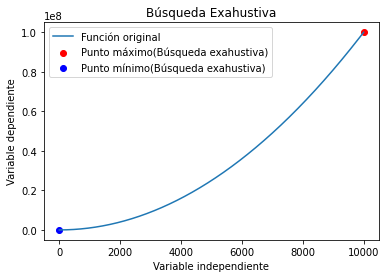

<Figure size 432x288 with 0 Axes>

In [17]:
x_a = np.arange(0,10001)
y_a = np.zeros(len(x_a))
y_a_muestreo = np.zeros(9)
#print(y_a)
start_time = time() #timer de inicio
max = -9999999999
min = 99999999999
index_min = 0
index_max = 0
for i in x_a:
  y_a[i] = func.subs(x,x_a[i])
  a=0.1
  if(y_a[i]<min):
    min = y_a[i]
  for j in range(9):
    subs = x_a[i]+a
    y_a_muestreo[j] = func.subs(x,subs)
    if(y_a_muestreo[j] > max):
      max = y_a_muestreo[j]
      index_max = subs
    if(y_a_muestreo[j] < min):
      min = y_a_muestreo[j]
      index_min = subs
    a+=0.1
elapsed_time = time() - start_time #timer fin

#tiempo transcurrido
display("The elapsed time is: ", elapsed_time)
display("The minimum value is: ", min)
display("The maximum value is: ", max)

plt.plot(x_a,y_a,label="Función original")
plt.title("Búsqueda Exahustiva")
plt.xlabel("Variable independiente")
plt.ylabel("Variable dependiente")
plt.scatter(index_max, max,c = "red",label="Punto máximo(Búsqueda exahustiva)")
plt.scatter(index_min,min,c="blue",label="Punto mínimo(Búsqueda exahustiva)")
plt.legend(loc="best")
plt.show()
plt.savefig("Naive_exploration_BE.tiff",dpf=300,quality=95,bbox_inches='tight')

##Método de Newton



'El indice en x para el valor máximo o mínimo es: '

-1

'El número total de iteraciones fue de: '

2

'El tiempo de ejecución del método de Newton fue de: '

0.0007071495056152344

'El índice -1 obtiene un mínimo de la función x**2 + 2*x'

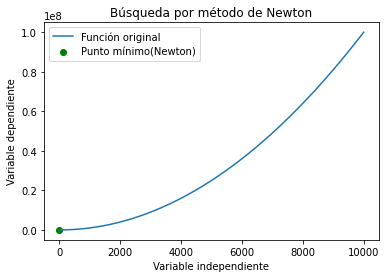

<Figure size 432x288 with 0 Axes>

In [18]:
#Definir una expresión simple
func = x**2 + 2*x

#valor inicial
x_1 = 1

#tolerancia
tol = 0.000001 

# numero max iter 
max_iter = 1000000


der1 = diff(func)#calculando la primer derivada
#display('Calculando la derivada: ', Derivative(func))#Imprimiendo la notación
#display(der1)#Imprimiendo primer derivada

#calculando segunda derivada 
der2 = diff(der1)
#display('calculando la derivada: ', Derivative(der1))
#display(der2)

#inicializar error (delta)
error = 99999#valor inicial para el error, se actualizará en el ciclo
count = 0
start_time_Newton = time()
while tol<error and count <max_iter:
  #Xk1 = xk - eval(f'(xf))/eval(f''(xk))
  x_2 = x_1 - (der1.subs(x,x_1)/der2.subs(x,x_1))
  #error = abs(actual-anterior)
  error = abs(x_1-x_2)
  #count += 1
  count += 1
  #xk =Xk1
  x_1 = x_2
#Tomar tiempo fin
elapsed_time_Newton = time() - start_time_Newton
display("El indice en x para el valor máximo o mínimo es: ",x_1)
display("El número total de iteraciones fue de: ",count)
#Sacar tiempo y hacer comparativa con el método anterior
display("El tiempo de ejecución del método de Newton fue de: ", elapsed_time_Newton)
# la segunda derivada mide su ritmo de crecimiento 
    # f''(x)<0 representa un máximo
    # f''(x)>0 representa un mínimo
if(der2.subs(x,x_1) > 0):
  display("El índice " + str(x_1) +" obtiene un mínimo de la función " + str(func))
  name = "Punto mínimo(Newton)"
else:
  display("El índice " + str(x_1) + " obtiene un máximo de la función" + str(func))
  name = "Punto máximo(Newton)"
## El mínimo o máximo encontrados en esta función, hay que graficarlos en la gráfica del método pasado
min_or_max = func.subs(x,x_1)


plt.plot(x_a,y_a,label="Función original")
plt.title("Búsqueda por método de Newton")
plt.xlabel("Variable independiente")
plt.ylabel("Variable dependiente")
#plt.scatter(index_max, max,c = "red",label="Punto máximo(Búsqueda exahustiva)")
#plt.scatter(index_min,min,c="blue",label="Punto mínimo(Búsqueda exahustiva)")
plt.scatter(x_1,min_or_max,c="green",label=name)
plt.legend(loc="best")
plt.show()
plt.savefig("Exploración_Newton.tiff",dpf=300,quality=95,bbox_inches='tight')

#Asignaciones (Miércoles 30 sep,11:59)
1. Hace una comparativa de los tiempos
2. Generar una gráfica para cada método
3. Revisar si se están obteniendo un valor máximo o valor mínimo(Revisar en la literatura cómo hacerlo)
4. Hacer reporte (Comparativas simples entre cada gráfica, comparar eficiencias, 1 a 2 cuartillas, )
4. Subir a schoology


De preferencia estructurarlo en programación orientada a objetos 
